<h1>1.读取认证信息和租户信息</h1>
认证信息不需要在每次调用接口时都去通过登录重新获取，认证信息的有效时间是7天，因此在7天内都可以重复使用，可以直接读取user_info.json中保存的认证信息。

In [ ]:
import json

with open('user_info.json', 'r', encoding='utf-8') as f:
    payload = json.load(f)

token=payload["token"]
tenantId=payload["tenantId"]
print("认证信息：",token)
print("租户信息：",tenantId)

## 获取出水水质

In [ ]:
#导入污水业务中台领域服务
from dhicn_wwtp_data_bus_service import *

# 设置地址 & 携带必要的认证信息
configuration=Configuration.get_default_copy()
configuration.host="https://online-products.dhichina.cn/gateway/wwtp-paas-main-bus-service" 
api_client=ApiClient(configuration)
api_client.set_default_header('Authorization',token)
api_client.set_default_header('tenantId',tenantId)

# 构建参数字典
param={
'start_time':'2023-06-26 16:56:00',
'end_time':'2023-06-27 16:56:00',
'model_name':'在线滚动模型'
}

# 调用接口
general_data_instance=GeneralDataApi(api_client)
response=general_data_instance.api_general_data_get_outlet_wq_get(**param)
general_data_instance.api_v2_output_data_boards_get()
print(response)

## 全开放性决策数据中心
- 获取全流程水质数据

In [ ]:
from dhicn_wwtp_data_bus_service import *

# 获取认证信息
configuration=Configuration.get_default_copy()
configuration.host="https://online-products.dhichina.cn/gateway/wwtp-paas-main-bus-service" 
api_client=ApiClient(configuration)
api_client.set_default_header('Authorization',token)
api_client.set_default_header('tenantId',tenantId)

# 构建参数
param={
'product_line':'1A',
'start_time':'2023-05-10 16:56:00',
'end_time':'2023-05-12 16:56:00',
'model_name':'在线滚动模型'
}

# 调用接口
general_data_instance=GeneralDataApi(api_client)
response=general_data_instance.api_v2_output_entire_process_ts_by_productline_get(**param)
print(response)


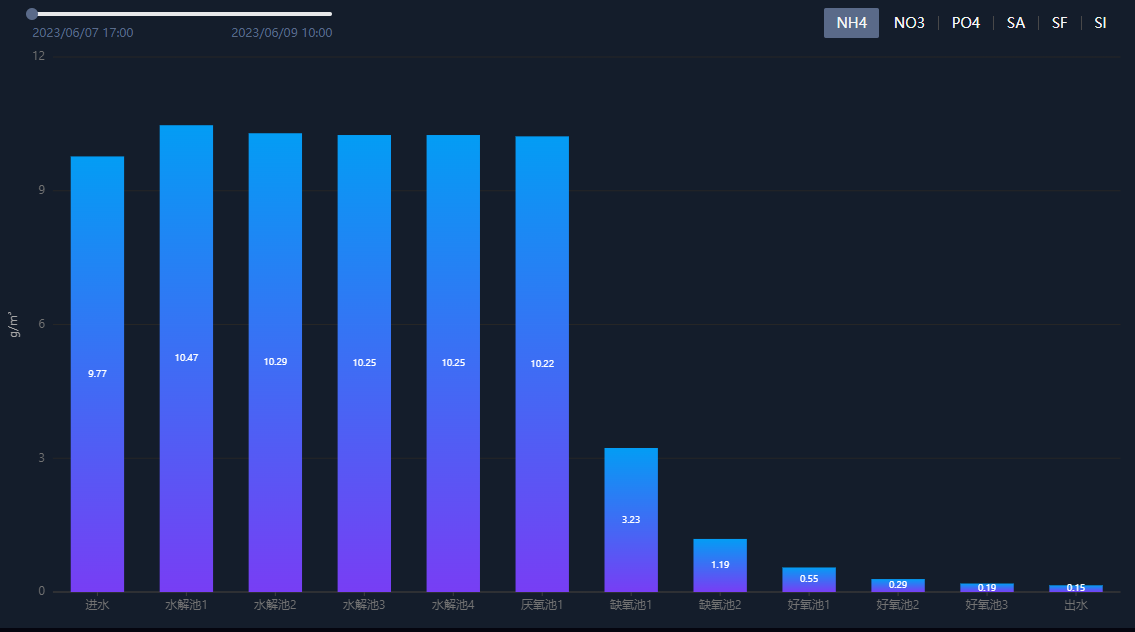